In [1]:
import pandas as pd


info_file = r"..\result\merged_with_matching_info_new.xlsx"

info_TABLE = pd.read_excel(info_file)
info_TABLE

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,온실가스 배출량(tCO2)_지역난방,온실가스 배출량(tCO2)_유류,온실가스 배출량(tCO2)_기타,온실가스 배출량(tCO2)_총계,공공건축물_PK,관리_건축물_유형,건축물_구분,건축물_종류,에너지공급기관코드,에너지고유번호
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927674
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927576
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927567
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927889
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1200300000,301709203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1262822,1,1,2,1100100000,921302930
25862,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264703,1,1,2,1100100000,921302930
25863,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264705,1,1,2,1100100000,921302930
25864,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264727,1,1,2,1100100000,921302930


In [2]:
info_TABLE['MGM_BLD_PK'].nunique()


1657

In [3]:
# MGM_BLD_PK별로 에너지고유번호 개수 확인
energy_count_by_building = info_TABLE.groupby('MGM_BLD_PK')['에너지고유번호'].nunique().reset_index()
energy_count_by_building.columns = ['MGM_BLD_PK', '에너지고유번호_개수']

# 결과 확인
print(f"총 건물 수: {energy_count_by_building.shape[0]}")
print("\n에너지고유번호 개수별 건물 분포:")
print(energy_count_by_building['에너지고유번호_개수'].value_counts().sort_index())

# 상위 10개 건물 확인 (에너지고유번호가 많은 순)
print("\n에너지고유번호가 가장 많은 건물 10개:")
print(energy_count_by_building.sort_values('에너지고유번호_개수', ascending=False).head(10))

energy_count_by_building


총 건물 수: 1657

에너지고유번호 개수별 건물 분포:
에너지고유번호_개수
1       308
2       181
3       162
4       153
5       136
6       117
7       101
8        88
9        78
10       52
11       49
12       35
13       23
14       28
15       11
16       15
17       10
18        9
19       10
20       11
21        6
22        4
23        6
24        6
25        3
26        1
27        2
28        2
29        5
30        1
31        4
32        2
33        3
34        1
35        2
36        1
37        3
40        4
41        2
42        1
43        1
44        1
46        1
48        1
54        1
56        2
57        1
61        1
62        1
64        1
69        1
71        1
74        2
76        1
77        1
82        1
85        1
92        1
1288      1
Name: count, dtype: int64

에너지고유번호가 가장 많은 건물 10개:
          MGM_BLD_PK  에너지고유번호_개수
65       11200-26004        1288
502  28110-100214229          92
939     41287-231300          85
24   11140-100209993          82
835       41171-9479          77


,MGM_BLD_PK,에너지고유번호_개수
0,11110-100180009,6
1,11110-100192417,8
2,11110-100196007,10
3,11110-100209086,11
4,11110-10398,4
...,...,...
1652,52750-1085,5
1653,52750-1174,1
1654,52790-100174162,9
1655,52800-100182279,6


In [5]:
# 엑셀 파일로 저장
energy_count_by_building.to_excel('../result/MGM-매칭정보에서_MGM별_에너지고유번호.xlsx', index=False)
print("파일이 성공적으로 저장되었습니다: '../result/MGM-매칭정보에서_MGM별_에너지고유번호.xlsx'")
energy_count_by_building


파일이 성공적으로 저장되었습니다: '../result/MGM-매칭정보에서_MGM별_에너지고유번호.xlsx'


,MGM_BLD_PK,에너지고유번호_개수
0,11110-100180009,6
1,11110-100192417,8
2,11110-100196007,10
3,11110-100209086,11
4,11110-10398,4
...,...,...
1652,52750-1085,5
1653,52750-1174,1
1654,52790-100174162,9
1655,52800-100182279,6


In [4]:
info_TABLE['에너지고유번호'].nunique()

12838

In [5]:
info_TABLE.columns

Index(['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하',
       'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE',
       '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT',
       'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens',
       'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS', '건축물ID',
       '단위면적당 1차 E사용량_전기 (KWH)', '단위면적당 1차 E사용량_가스 (KWH)',
       '단위면적당 1차 E사용량_지역냉난방 (KWH)', '단위면적당 1차 E사용량_유류 (KWH)',
       '단위면적당 1차 E사용량_기타 (KWH)', 'EUI(1차E/냉난방 면적)', 'EUI(1차E/연면적)', '준공년도',
       'E사용량 (kWh)_전기 (KWH)', 'E사용량 (kWh)_가스 (KWH)', 'E사용량 (kWh)_지역냉난방 (KWH)',
       'E사용량 (kWh)_유류 (KWH)', 'E사용량 (kWh)_기타 (KWH)', 'E사용량 (toe)_전기 (toe)',
       'E사용량 (toe)_가스 (toe)', 'E사용량 (toe)_지역냉난방 (toe)', 'E사용량 (toe)_유류 (toe)',
       'E사용량 (toe)_기타 (toe)', '온실가스 배출량(tCO2)_전기', '온실가스 배출량(tCO2)_가스',
       '온실가스 배출량(tCO2)_지역난방', '온실가스 배출량(tCO2)_유류', '온실가스 배출량(tCO2)_기타',
       '온실가스 배출량(tCO2)_총계', '공공건축물_PK',

In [6]:
info_TABLE['에너지고유번호'].nunique()


12838

In [7]:

info_TABLE['에너지고유번호'].value_counts()

에너지고유번호
1860000000000     1500
10101000000000     972
2070020000000      104
2000704666          54
1717180625          49
                  ... 
1026212990           1
522365057            1
526041050            1
1210522823           1
1210522824           1
Name: count, Length: 12838, dtype: int64

In [8]:
# 컬럼명 리스트 정의
# columns = [
#     'SEQ_NO',
#     'ENGY_SPLY_KIK_CD',
#     'ENGY_ESNCNO',
#     'USE_YM',
#     'USE_QTY_SEQNO',
#     'USE_STRT_DAY',
#     'USE_END_DAY',
#     'USE_PURPS_CD',
#     'USE_QTY',
#     'UNIT_CD'
# ]
usage_file = r"..\result\사용량정보_23.csv"

usage_23 = pd.read_csv(usage_file)
usage_23


,SEQ_NO,ENGY_SPLY_KIK_CD,ENGY_ESNCNO,USE_YM,USE_QTY_SEQNO,USE_STRT_DAY,USE_END_DAY,USE_PURPS_CD,USE_QTY,UNIT_CD
0,2663380,1200300000,302819125,202301,1,20230101.0,20230131.0,21.0,149646.4200,8
1,356783,1100100000,135164346,202301,1,20221211.0,20230110.0,2.0,29098.0000,1
2,48582,1201000000,6102702925,202301,1,NaN,NaN,10.0,68761.6832,8
3,1532559,1100100000,230050841,202301,1,20221225.0,20230124.0,10.0,281704.0000,1
4,5195130,1100100000,926366362,202301,1,20221219.0,20230118.0,2.0,92.0000,1
...,...,...,...,...,...,...,...,...,...,...
2477569,5212035,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477570,5212126,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477571,5212128,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477572,60867,1100100000,1127378353,202312,1,20231201.0,20231231.0,2.0,110.0000,1


In [9]:
# 데이터 확인
print("데이터 미리보기:")
print(usage_23.head())

# 데이터 기본 정보 확인
print("\n데이터 정보:")
print(usage_23.info())


데이터 미리보기:
    SEQ_NO  ENGY_SPLY_KIK_CD  ENGY_ESNCNO  USE_YM  USE_QTY_SEQNO  \
0  2663380        1200300000    302819125  202301              1   
1   356783        1100100000    135164346  202301              1   
2    48582        1201000000   6102702925  202301              1   
3  1532559        1100100000    230050841  202301              1   
4  5195130        1100100000    926366362  202301              1   

   USE_STRT_DAY  USE_END_DAY  USE_PURPS_CD      USE_QTY  UNIT_CD  
0    20230101.0   20230131.0          21.0  149646.4200        8  
1    20221211.0   20230110.0           2.0   29098.0000        1  
2           NaN          NaN          10.0   68761.6832        8  
3    20221225.0   20230124.0          10.0  281704.0000        1  
4    20221219.0   20230118.0           2.0      92.0000        1  

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477574 entries, 0 to 2477573
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            ---

In [12]:
usage_23

,SEQ_NO,ENGY_SPLY_KIK_CD,ENGY_ESNCNO,USE_YM,USE_QTY_SEQNO,USE_STRT_DAY,USE_END_DAY,USE_PURPS_CD,USE_QTY,UNIT_CD
0,2663380,1200300000,302819125,202301,1,20230101.0,20230131.0,21.0,149646.4200,8
1,356783,1100100000,135164346,202301,1,20221211.0,20230110.0,2.0,29098.0000,1
2,48582,1201000000,6102702925,202301,1,NaN,NaN,10.0,68761.6832,8
3,1532559,1100100000,230050841,202301,1,20221225.0,20230124.0,10.0,281704.0000,1
4,5195130,1100100000,926366362,202301,1,20221219.0,20230118.0,2.0,92.0000,1
...,...,...,...,...,...,...,...,...,...,...
2477569,5212035,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477570,5212126,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477571,5212128,1100100000,928098381,202312,1,20231201.0,20231231.0,2.0,142.0000,1
2477572,60867,1100100000,1127378353,202312,1,20231201.0,20231231.0,2.0,110.0000,1


In [10]:
usage_23['ENGY_ESNCNO'].nunique()

43615

In [11]:
usage_23['ENGY_ESNCNO'].value_counts()

ENGY_ESNCNO
950512        2205
2000704666     648
547102757      594
547058038      594
5445075        588
              ... 
346114518        1
443219562        1
160728986        1
160880524        1
1031123774       1
Name: count, Length: 43615, dtype: int64

In [12]:
usage_23['SEQ_NO'].value_counts()

SEQ_NO
3271621           51780
2762222           14588
2762219           14588
3231631            9424
3233433            9424
                  ...  
381460                5
5553573               4
10000000173182        1
480978                1
205187                1
Name: count, Length: 3852, dtype: int64

In [13]:
# MGM_BLD_PK별로 에너지고유번호 개수 확인
energy_count_by_building = usage_23.groupby('SEQ_NO')['ENGY_ESNCNO'].nunique().reset_index()
energy_count_by_building.columns = ['SEQ_NO', '에너지고유번호_개수']

# 결과 확인
print(f"총 건물 수: {energy_count_by_building.shape[0]}")
print("\n에너지고유번호 개수별 건물 분포:")
print(energy_count_by_building['에너지고유번호_개수'].value_counts().sort_index())

# 상위 10개 건물 확인 (에너지고유번호가 많은 순)
print("\n에너지고유번호가 가장 많은 건물 10개:")
print(energy_count_by_building.sort_values('에너지고유번호_개수', ascending=False).head(10))

energy_count_by_building


총 건물 수: 3852

에너지고유번호 개수별 건물 분포:
에너지고유번호_개수
1       117
2       172
3       264
4       218
5       230
       ... 
544       1
701      49
820      32
1217      2
5634      1
Name: count, Length: 122, dtype: int64

에너지고유번호가 가장 많은 건물 10개:
       SEQ_NO  에너지고유번호_개수
2156  3271621        5634
1928  2762219        1217
1929  2762222        1217
2135  3234685         820
2129  3234678         820
2130  3234679         820
2131  3234680         820
2121  3234412         820
2120  3234404         820
2122  3234417         820


,SEQ_NO,에너지고유번호_개수
0,972,20
1,974,20
2,975,20
3,976,16
4,1862,6
...,...,...
3847,10000006164722,24
3848,10000006164723,24
3849,10000006164724,24
3850,10000006164725,24


In [14]:
info_TABLE['에너지고유번호'].value_counts()


에너지고유번호
1860000000000     1500
10101000000000     972
2070020000000      104
2000704666          54
1717180625          49
                  ... 
1026212990           1
522365057            1
526041050            1
1210522823           1
1210522824           1
Name: count, Length: 12838, dtype: int64

In [15]:
info_TABLE

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,온실가스 배출량(tCO2)_지역난방,온실가스 배출량(tCO2)_유류,온실가스 배출량(tCO2)_기타,온실가스 배출량(tCO2)_총계,공공건축물_PK,관리_건축물_유형,건축물_구분,건축물_종류,에너지공급기관코드,에너지고유번호
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927674
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927576
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927567
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927889
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1200300000,301709203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1262822,1,1,2,1100100000,921302930
25862,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264703,1,1,2,1100100000,921302930
25863,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264705,1,1,2,1100100000,921302930
25864,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264727,1,1,2,1100100000,921302930


In [76]:
usage_23['ENGY_ESNCNO'].nunique()


43615

In [77]:


usage_23['ENGY_ESNCNO'].value_counts()

ENGY_ESNCNO
950512        2205
2000704666     648
547102757      594
547058038      594
5445075        588
              ... 
346114518        1
443219562        1
160728986        1
160880524        1
1031123774       1
Name: count, Length: 43615, dtype: int64

In [16]:
info_TABLE

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,온실가스 배출량(tCO2)_지역난방,온실가스 배출량(tCO2)_유류,온실가스 배출량(tCO2)_기타,온실가스 배출량(tCO2)_총계,공공건축물_PK,관리_건축물_유형,건축물_구분,건축물_종류,에너지공급기관코드,에너지고유번호
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927674
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927576
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927567
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927889
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1200300000,301709203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1262822,1,1,2,1100100000,921302930
25862,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264703,1,1,2,1100100000,921302930
25863,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264705,1,1,2,1100100000,921302930
25864,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264727,1,1,2,1100100000,921302930


In [17]:
merged_df = pd.merge(
    info_TABLE[['에너지고유번호']],
    usage_23[['ENGY_ESNCNO']],
    left_on='에너지고유번호',
    right_on='ENGY_ESNCNO',
    how='left'
)

# 1. 총 일치하는 레코드 수 확인
total_matches = len(merged_df)
print("총 일치하는 레코드 수:", total_matches)

# 2. 각 고윳값 별 중복(매칭) 건수 확인
value_counts = merged_df['에너지고유번호'].value_counts()
print("\n각 에너지고유번호의 매칭 건수:")
print(value_counts)

총 일치하는 레코드 수: 2542360

각 에너지고유번호의 매칭 건수:
에너지고유번호
2000704666    34992
6002878       28812
5829725       28812
1718894210    28812
1717180625    28812
              ...  
537535381         1
400159216         1
1022045           1
414776489         1
422160789         1
Name: count, Length: 12838, dtype: int64


In [19]:
merged_df = pd.merge(
    info_TABLE,
    usage_23,
    left_on='에너지고유번호',
    right_on='ENGY_ESNCNO',
    how='left'
)

# 1. 총 일치하는 레코드 수 확인
total_matches = len(merged_df)
print("총 일치하는 레코드 수:", total_matches)

# 2. 각 고윳값 별 중복(매칭) 건수 확인
value_counts = merged_df['에너지고유번호'].value_counts()
print("\n각 에너지고유번호의 매칭 건수:")
print(value_counts)

총 일치하는 레코드 수: 2542360

각 에너지고유번호의 매칭 건수:
에너지고유번호
2000704666    34992
6002878       28812
5829725       28812
1718894210    28812
1717180625    28812
              ...  
537535381         1
400159216         1
1022045           1
414776489         1
422160789         1
Name: count, Length: 12838, dtype: int64


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542360 entries, 0 to 2542359
Data columns (total 68 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SEQ_NO_x                   int64         
 1   RECAP_PK                   object        
 2   연면적                        float64       
 3   사용승인연도                     datetime64[ns]
 4   기관명                        object        
 5   건축물명                       object        
 6   주소                         object        
 7   지상                         float64       
 8   지하                         float64       
 9   TOTAREA                    float64       
 10  BLD_NM                     object        
 11  DONG_NM                    object        
 12  USE_DATE                   object        
 13  MGM_BLD_PK                 object        
 14  MATCH_STAGE                object        
 15  비고                         object        
 16  EBD_COUNT                  int64    

In [25]:
# ENGY_ESNCNO 컬럼의 결측치 개수 확인
missing_count = merged_df['ENGY_ESNCNO'].isna().sum()
print(f"ENGY_ESNCNO 컬럼의 결측치 개수: {missing_count}")

# 전체 데이터 중 결측치 비율 계산
total_rows = len(merged_df)
missing_percentage = (missing_count / total_rows) * 100
print(f"전체 {total_rows}행 중 결측치 비율: {missing_percentage:.2f}%")

ENGY_ESNCNO 컬럼의 결측치 개수: 7657
전체 2542360행 중 결측치 비율: 0.30%


In [28]:
# ENGY_ESNCNO 컬럼의 결측치 개수 확인
missing_count = merged_df['SEQ_NO_x'].isna().sum()
print(f"ENGY_ESNCNO 컬럼의 결측치 개수: {missing_count}")

# 전체 데이터 중 결측치 비율 계산
total_rows = len(merged_df)
missing_percentage = (missing_count / total_rows) * 100
print(f"전체 {total_rows}행 중 결측치 비율: {missing_percentage:.2f}%")

ENGY_ESNCNO 컬럼의 결측치 개수: 0
전체 2542360행 중 결측치 비율: 0.00%


In [29]:
# ENGY_ESNCNO 컬럼의 결측치 개수 확인
missing_count = merged_df['SEQ_NO_y'].isna().sum()
print(f"ENGY_ESNCNO 컬럼의 결측치 개수: {missing_count}")

# 전체 데이터 중 결측치 비율 계산
total_rows = len(merged_df)
missing_percentage = (missing_count / total_rows) * 100
print(f"전체 {total_rows}행 중 결측치 비율: {missing_percentage:.2f}%")

ENGY_ESNCNO 컬럼의 결측치 개수: 7657
전체 2542360행 중 결측치 비율: 0.30%


In [ ]:
merged_df['ENGY_ESNCNO'].nunique()

9653

In [ ]:
merged_df['에너지고유번호'].nunique()

12838

In [26]:
merged_df

,SEQ_NO_x,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,SEQ_NO_y,ENGY_SPLY_KIK_CD,ENGY_ESNCNO,USE_YM,USE_QTY_SEQNO,USE_STRT_DAY,USE_END_DAY,USE_PURPS_CD,USE_QTY,UNIT_CD
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466.0,1.100100e+09,1.007928e+09,202301.0,1.0,20221217.0,20230116.0,7.0,45.0,1.0
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466.0,1.100100e+09,1.007928e+09,202302.0,1.0,20230117.0,20230216.0,7.0,0.0,1.0
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466.0,1.100100e+09,1.007928e+09,202303.0,1.0,20230217.0,20230316.0,7.0,20.0,1.0
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466.0,1.100100e+09,1.007928e+09,202304.0,1.0,20230317.0,20230416.0,7.0,0.0,1.0
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466.0,1.100100e+09,1.007928e+09,202305.0,1.0,20230417.0,20230516.0,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542355,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012.0,1.100100e+09,2.348326e+08,202308.0,1.0,20230726.0,20230825.0,2.0,62338.0,1.0
2542356,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012.0,1.100100e+09,2.348326e+08,202309.0,1.0,20230826.0,20230925.0,2.0,47329.0,1.0
2542357,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012.0,1.100100e+09,2.348326e+08,202310.0,1.0,20230926.0,20231025.0,2.0,47851.0,1.0
2542358,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012.0,1.100100e+09,2.348326e+08,202311.0,1.0,20231026.0,20231125.0,2.0,72770.0,1.0


In [82]:
info_TABLE

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,온실가스 배출량(tCO2)_지역난방,온실가스 배출량(tCO2)_유류,온실가스 배출량(tCO2)_기타,온실가스 배출량(tCO2)_총계,공공건축물_PK,관리_건축물_유형,건축물_구분,건축물_종류,에너지공급기관코드,에너지고유번호
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927674
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927576
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927567
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1100100000,1007927889
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,51.105555,0.194113,0.0,345.543762,6284466,1,1,2,1200300000,301709203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25861,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1262822,1,1,2,1100100000,921302930
25862,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264703,1,1,2,1100100000,921302930
25863,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264705,1,1,2,1100100000,921302930
25864,1262815,48170-1089,4065.80,1994-07-30,경상국립대학교,18동 공학1호관(칠암동),경상남도 진주시 칠암동 150-1외3필지,5.0,1.0,4065.80,...,0.000000,0.000000,0.0,91.016201,1264727,1,1,2,1100100000,921302930


In [83]:
info_TABLE[["SEQ_NO", "MGM_BLD_PK", "E사용량 (kWh)_전기 (KWH)", "E사용량 (kWh)_가스 (KWH)", "E사용량 (kWh)_지역냉난방 (KWH)"]]

,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH)
0,6284466,41287-231300,591315.973080,120258.11721,238505.00443
1,6284466,41287-231300,591315.973080,120258.11721,238505.00443
2,6284466,41287-231300,591315.973080,120258.11721,238505.00443
3,6284466,41287-231300,591315.973080,120258.11721,238505.00443
4,6284466,41287-231300,591315.973080,120258.11721,238505.00443
...,...,...,...,...,...
25861,1262815,48170-7540,199291.003785,0.00000,0.00000
25862,1262815,48170-7540,199291.003785,0.00000,0.00000
25863,1262815,48170-7540,199291.003785,0.00000,0.00000
25864,1262815,48170-7540,199291.003785,0.00000,0.00000


In [32]:


# 두 데이터프레임 병합: info_TABLE의 "에너지 고유 번호"와 usage_23의 "ENGY_ESNCNO"를 기준으로 left join 진행
result_1 = pd.merge(
    info_TABLE,
    usage_23, 
    left_on='에너지고유번호', 
    right_on='ENGY_ESNCNO', 
    how='inner'
)

# 결과 미리보기
result_1


,SEQ_NO_x,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,SEQ_NO_y,ENGY_SPLY_KIK_CD,ENGY_ESNCNO,USE_YM,USE_QTY_SEQNO,USE_STRT_DAY,USE_END_DAY,USE_PURPS_CD,USE_QTY,UNIT_CD
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466,1100100000,1007927674,202301,1,20221217.0,20230116.0,7.0,45.0,1
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466,1100100000,1007927674,202302,1,20230117.0,20230216.0,7.0,0.0,1
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466,1100100000,1007927674,202303,1,20230217.0,20230316.0,7.0,20.0,1
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466,1100100000,1007927674,202304,1,20230317.0,20230416.0,7.0,0.0,1
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,6284466,1100100000,1007927674,202305,1,20230417.0,20230516.0,7.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534698,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012,1100100000,234832642,202308,1,20230726.0,20230825.0,2.0,62338.0,1
2534699,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012,1100100000,234832642,202309,1,20230826.0,20230925.0,2.0,47329.0,1
2534700,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012,1100100000,234832642,202310,1,20230926.0,20231025.0,2.0,47851.0,1
2534701,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,3393012,1100100000,234832642,202311,1,20231026.0,20231125.0,2.0,72770.0,1


In [34]:
result_1['SEQ_NO_x'].nunique()


1570

In [35]:
result_1['SEQ_NO_y'].nunique() # 매칭정보에 있는 SEQ_NO로 볼 필요 없음


2325

In [36]:
# SEQ_NO_y를 제거하고 SEQ_NO_x를 SEQ_NO로 변경
result_1 = result_1.drop('SEQ_NO_y', axis=1)
result_1 = result_1.rename(columns={'SEQ_NO_x': 'SEQ_NO'})
result_1.columns

Index(['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하',
       'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE',
       '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT',
       'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens',
       'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS', '건축물ID',
       '단위면적당 1차 E사용량_전기 (KWH)', '단위면적당 1차 E사용량_가스 (KWH)',
       '단위면적당 1차 E사용량_지역냉난방 (KWH)', '단위면적당 1차 E사용량_유류 (KWH)',
       '단위면적당 1차 E사용량_기타 (KWH)', 'EUI(1차E/냉난방 면적)', 'EUI(1차E/연면적)', '준공년도',
       'E사용량 (kWh)_전기 (KWH)', 'E사용량 (kWh)_가스 (KWH)', 'E사용량 (kWh)_지역냉난방 (KWH)',
       'E사용량 (kWh)_유류 (KWH)', 'E사용량 (kWh)_기타 (KWH)', 'E사용량 (toe)_전기 (toe)',
       'E사용량 (toe)_가스 (toe)', 'E사용량 (toe)_지역냉난방 (toe)', 'E사용량 (toe)_유류 (toe)',
       'E사용량 (toe)_기타 (toe)', '온실가스 배출량(tCO2)_전기', '온실가스 배출량(tCO2)_가스',
       '온실가스 배출량(tCO2)_지역난방', '온실가스 배출량(tCO2)_유류', '온실가스 배출량(tCO2)_기타',
       '온실가스 배출량(tCO2)_총계', '공공건축물_PK',

In [39]:
print(result_1['MGM_BLD_PK'].nunique())
print(result_1['SEQ_NO'].nunique())


1570
1570


In [40]:
print(result_1['에너지고유번호'].nunique())
print(result_1['ENGY_ESNCNO'].nunique())


9653
9653


In [38]:
# 두 변수의 일치 여부 확인
print("SEQ_NO와 건축물ID가 일치하는지 확인:")
print((result_1['SEQ_NO'] == result_1['건축물ID']).all())

# 두 변수의 값 비교
print("\nSEQ_NO와 건축물ID의 값 비교:")
print(result_1[['SEQ_NO','건축물ID']].head(10))

# 불일치하는 경우 확인
print("\n불일치하는 경우:")
mismatch = result_1[result_1['SEQ_NO'] != result_1['건축물ID']]
print(mismatch[['SEQ_NO','건축물ID']].head())

SEQ_NO와 건축물ID가 일치하는지 확인:
True

SEQ_NO와 건축물ID의 값 비교:
    SEQ_NO    건축물ID
0  6284466  6284466
1  6284466  6284466
2  6284466  6284466
3  6284466  6284466
4  6284466  6284466
5  6284466  6284466
6  6284466  6284466
7  6284466  6284466
8  6284466  6284466
9  6284466  6284466

불일치하는 경우:
Empty DataFrame
Columns: [SEQ_NO, 건축물ID]
Index: []


In [41]:
# 에너지고유번호의 고유값 개수 출력
print("에너지고유번호 고유값 개수:", result_1['에너지고유번호'].nunique())

# 결측치가 있는 행 출력
print("\n결측치가 있는 행:")
print(result_1[result_1['에너지고유번호'].isna()])

에너지고유번호 고유값 개수: 9653

결측치가 있는 행:
Empty DataFrame
Columns: [SEQ_NO, RECAP_PK, 연면적, 사용승인연도, 기관명, 건축물명, 주소, 지상, 지하, TOTAREA, BLD_NM, DONG_NM, USE_DATE, MGM_BLD_PK, MATCH_STAGE, 비고, EBD_COUNT, BD_COUNT, EBD_OVER_BD, MATCH_TOKEN_COUNT, ebd_unified_tokens, 건축물명_tokens, 주소_tokens, BLD_NM_tokens, DONG_NM_tokens, MATCHED_BLD_TOKENS, MATCHED_DONG_TOKENS, 건축물ID, 단위면적당 1차 E사용량_전기 (KWH), 단위면적당 1차 E사용량_가스 (KWH), 단위면적당 1차 E사용량_지역냉난방 (KWH), 단위면적당 1차 E사용량_유류 (KWH), 단위면적당 1차 E사용량_기타 (KWH), EUI(1차E/냉난방 면적), EUI(1차E/연면적), 준공년도, E사용량 (kWh)_전기 (KWH), E사용량 (kWh)_가스 (KWH), E사용량 (kWh)_지역냉난방 (KWH), E사용량 (kWh)_유류 (KWH), E사용량 (kWh)_기타 (KWH), E사용량 (toe)_전기 (toe), E사용량 (toe)_가스 (toe), E사용량 (toe)_지역냉난방 (toe), E사용량 (toe)_유류 (toe), E사용량 (toe)_기타 (toe), 온실가스 배출량(tCO2)_전기, 온실가스 배출량(tCO2)_가스, 온실가스 배출량(tCO2)_지역난방, 온실가스 배출량(tCO2)_유류, 온실가스 배출량(tCO2)_기타, 온실가스 배출량(tCO2)_총계, 공공건축물_PK, 관리_건축물_유형, 건축물_구분, 건축물_종류, 에너지공급기관코드, 에너지고유번호, ENGY_SPLY_KIK_CD, ENGY_ESNCNO, USE_YM, USE_QTY_SEQNO, USE_STRT_DAY, USE_END_DAY, USE_PURPS_CD, US

In [42]:
# 모든 변수의 결측치 개수 확인
missing_values = result_1.isnull().sum()
print("각 변수별 결측치 개수:")
print(missing_values)

# 결측치가 있는 변수만 출력
missing_values_filtered = missing_values[missing_values > 0]
print("\n결측치가 있는 변수만 출력:")
print(missing_values_filtered)

# 결측치 비율 계산
missing_percentage = (result_1.isnull().sum() / len(result_1)) * 100
print("\n각 변수별 결측치 비율(%):")
print(missing_percentage[missing_percentage > 0])

각 변수별 결측치 개수:
SEQ_NO               0
RECAP_PK             0
연면적                  0
사용승인연도               0
기관명                  0
                 ...  
USE_STRT_DAY    283714
USE_END_DAY     283711
USE_PURPS_CD     14543
USE_QTY              0
UNIT_CD              0
Length: 67, dtype: int64

결측치가 있는 변수만 출력:
지상                         784
지하                       20908
BLD_NM                 1522928
DONG_NM                 243917
USE_DATE                202719
비고                     2534691
MATCH_TOKEN_COUNT      1737626
ebd_unified_tokens     1737626
건축물명_tokens            1737626
주소_tokens              1737626
BLD_NM_tokens          1737626
DONG_NM_tokens         1737626
MATCHED_BLD_TOKENS     1737626
MATCHED_DONG_TOKENS    1737626
USE_STRT_DAY            283714
USE_END_DAY             283711
USE_PURPS_CD             14543
dtype: int64

각 변수별 결측치 비율(%):
지상                      0.030931
지하                      0.824870
BLD_NM                 60.083095
DONG_NM                 9.623100
U

In [43]:
# ENGY_SPLY_KIK_CD의 앞 두 자리를 추출하여 숫자로 변환하고, nullable 정수형(Int64)으로 캐스팅
result_1['ENGY_type'] = pd.to_numeric(
    result_1['ENGY_SPLY_KIK_CD'].astype(str).str[:2], errors='coerce'
).astype('Int64')

# 결과 확인
print(result_1[['ENGY_SPLY_KIK_CD', 'ENGY_type']].head())


   ENGY_SPLY_KIK_CD  ENGY_type
0        1100100000         11
1        1100100000         11
2        1100100000         11
3        1100100000         11
4        1100100000         11


In [44]:
result_1['ENGY_type'].value_counts()

ENGY_type
12    1287429
11     975797
13     271477
Name: count, dtype: Int64

In [45]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534703 entries, 0 to 2534702
Data columns (total 68 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SEQ_NO                     int64         
 1   RECAP_PK                   object        
 2   연면적                        float64       
 3   사용승인연도                     datetime64[ns]
 4   기관명                        object        
 5   건축물명                       object        
 6   주소                         object        
 7   지상                         float64       
 8   지하                         float64       
 9   TOTAREA                    float64       
 10  BLD_NM                     object        
 11  DONG_NM                    object        
 12  USE_DATE                   object        
 13  MGM_BLD_PK                 object        
 14  MATCH_STAGE                object        
 15  비고                         object        
 16  EBD_COUNT                  int64    

In [122]:
result_1[["ENGY_ESNCNO", "UNIT_CD", "SEQ_NO", "MGM_BLD_PK", "E사용량 (kWh)_전기 (KWH)", "E사용량 (kWh)_가스 (KWH)", "E사용량 (kWh)_지역냉난방 (KWH)","USE_YM"]]

,ENGY_ESNCNO,UNIT_CD,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_YM
0,1.007928e+09,1.0,6284466,41287-231300,591315.97308,120258.11721,238505.00443,202301.0
1,1.007928e+09,1.0,6284466,41287-231300,591315.97308,120258.11721,238505.00443,202302.0
2,1.007928e+09,1.0,6284466,41287-231300,591315.97308,120258.11721,238505.00443,202303.0
3,1.007928e+09,1.0,6284466,41287-231300,591315.97308,120258.11721,238505.00443,202304.0
4,1.007928e+09,1.0,6284466,41287-231300,591315.97308,120258.11721,238505.00443,202305.0
...,...,...,...,...,...,...,...,...
2542355,2.348326e+08,1.0,3393012,41463-89071,0.00000,0.00000,0.00000,202308.0
2542356,2.348326e+08,1.0,3393012,41463-89071,0.00000,0.00000,0.00000,202309.0
2542357,2.348326e+08,1.0,3393012,41463-89071,0.00000,0.00000,0.00000,202310.0
2542358,2.348326e+08,1.0,3393012,41463-89071,0.00000,0.00000,0.00000,202311.0


In [98]:
result_1.columns

Index(['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하',
       'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE',
       '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT',
       'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens',
       'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS', '건축물ID',
       '단위면적당 1차 E사용량_전기 (KWH)', '단위면적당 1차 E사용량_가스 (KWH)',
       '단위면적당 1차 E사용량_지역냉난방 (KWH)', '단위면적당 1차 E사용량_유류 (KWH)',
       '단위면적당 1차 E사용량_기타 (KWH)', 'EUI(1차E/냉난방 면적)', 'EUI(1차E/연면적)', '준공년도',
       'E사용량 (kWh)_전기 (KWH)', 'E사용량 (kWh)_가스 (KWH)', 'E사용량 (kWh)_지역냉난방 (KWH)',
       'E사용량 (kWh)_유류 (KWH)', 'E사용량 (kWh)_기타 (KWH)', 'E사용량 (toe)_전기 (toe)',
       'E사용량 (toe)_가스 (toe)', 'E사용량 (toe)_지역냉난방 (toe)', 'E사용량 (toe)_유류 (toe)',
       'E사용량 (toe)_기타 (toe)', '온실가스 배출량(tCO2)_전기', '온실가스 배출량(tCO2)_가스',
       '온실가스 배출량(tCO2)_지역난방', '온실가스 배출량(tCO2)_유류', '온실가스 배출량(tCO2)_기타',
       '온실가스 배출량(tCO2)_총계', '공공건축물_PK',

In [99]:
result_1['ENGY_type'].value_counts()


ENGY_type
12    1287429
11     975797
13     271477
Name: count, dtype: Int64

In [100]:
result_1['UNIT_CD'].value_counts()

UNIT_CD
8.0    1287357
1.0     975797
3.0     271138
4.0        303
2.0         72
6.0         36
Name: count, dtype: int64

In [48]:
# 데이터프레임을 엑셀 파일로 저장
result_1.to_csv(r'../result/매칭정보_사용량_합_원본_0422.csv', index=False)
print("데이터프레임이 '에너지_사용량_데이터.csv' 파일로 저장되었습니다.")

데이터프레임이 '에너지_사용량_데이터.csv' 파일로 저장되었습니다.


In [49]:
# 여러 변수들의 중복값 확인하기
# 확인하고 싶은 변수들을 리스트로 정의
variables = ['SEQ_NO', 'MGM_BLD_PK','E사용량 (kWh)_전기 (KWH)','E사용량 (kWh)_가스 (KWH)','E사용량 (kWh)_지역냉난방 (KWH)']

# 각 변수별 중복값 확인
for var in variables:
    duplicate_counts = result_1[var].value_counts()
    print(f"\n{var}의 중복값 개수:")
    print(duplicate_counts[duplicate_counts > 1].head(10))  # 상위 10개만 출력

# 여러 변수 조합의 중복값 확인
combination = ['SEQ_NO', 'MGM_BLD_PK','E사용량 (kWh)_전기 (KWH)','E사용량 (kWh)_가스 (KWH)','E사용량 (kWh)_지역냉난방 (KWH)']
duplicate_combinations = result_1.groupby(combination).size().reset_index(name='count')
print("\n변수 조합의 중복값:")
print(duplicate_combinations[duplicate_combinations['count'] > 1].head(10))


SEQ_NO의 중복값 개수:
SEQ_NO
3234681    98304
5784604    77682
5342546    76800
5342365    57600
5352253    57600
3234417    49152
1632113    42336
5343520    38400
5842676    38400
5342277    38400
Name: count, dtype: int64

MGM_BLD_PK의 중복값 개수:
MGM_BLD_PK
11620-100197743    98304
41550-100203907    77682
43112-100224614    76800
43112-103838       57600
43112-103829       57600
11620-2787         49152
44133-5466         42336
43112-103796       38400
30200-12761        38400
43112-100224629    38400
Name: count, dtype: int64

E사용량 (kWh)_전기 (KWH)의 중복값 개수:
E사용량 (kWh)_전기 (KWH)
1.916901e+06    98304
6.142920e+05    77682
7.451780e+05    76800
2.859600e+05    57600
1.356634e+07    57600
4.147420e+05    49152
3.626960e+05    42336
5.210010e+05    38400
2.871350e+05    38400
2.677970e+05    38400
Name: count, dtype: int64

E사용량 (kWh)_가스 (KWH)의 중복값 개수:
E사용량 (kWh)_가스 (KWH)
0.000000e+00    940043
1.525553e+06     98304
4.652466e+05     76800
1.169824e+05     57600
1.382368e+07     57600
7.860283e+0

In [59]:
result_1

,SEQ_NO,RECAP_PK,연면적,사용승인연도,기관명,건축물명,주소,지상,지하,TOTAREA,...,ENGY_SPLY_KIK_CD,ENGY_ESNCNO,USE_YM,USE_QTY_SEQNO,USE_STRT_DAY,USE_END_DAY,USE_PURPS_CD,USE_QTY,UNIT_CD,ENGY_type
0,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,1100100000,1007927674,202301,1,20221217.0,20230116.0,7.0,45.0,1,11
1,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,1100100000,1007927674,202302,1,20230117.0,20230216.0,7.0,0.0,1,11
2,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,1100100000,1007927674,202303,1,20230217.0,20230316.0,7.0,20.0,1,11
3,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,1100100000,1007927674,202304,1,20230317.0,20230416.0,7.0,0.0,1,11
4,6284466,41287-226841,13668.94,1991-12-31,한국장애인고용공단,일산직업능력개발원,"경기도 고양시 일산서구 탄현로 155(탄현동 111-14번지, 일산직업능력개발센터 ...",3.0,0.0,2128.20,...,1100100000,1007927674,202305,1,20230417.0,20230516.0,7.0,0.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534698,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,1100100000,234832642,202308,1,20230726.0,20230825.0,2.0,62338.0,1,11
2534699,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,1100100000,234832642,202309,1,20230826.0,20230925.0,2.0,47329.0,1,11
2534700,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,1100100000,234832642,202310,1,20230926.0,20231025.0,2.0,47851.0,1,11
2534701,3393012,41463-89071,5765.38,1985-12-22,서울특별시,서울시립용인정신병원,경기도 용인시 기흥구 상하동 7-1,5.0,1.0,5849.66,...,1100100000,234832642,202311,1,20231026.0,20231125.0,2.0,72770.0,1,11


In [69]:
result_1.columns

Index(['SEQ_NO', 'RECAP_PK', '연면적', '사용승인연도', '기관명', '건축물명', '주소', '지상', '지하',
       'TOTAREA', 'BLD_NM', 'DONG_NM', 'USE_DATE', 'MGM_BLD_PK', 'MATCH_STAGE',
       '비고', 'EBD_COUNT', 'BD_COUNT', 'EBD_OVER_BD', 'MATCH_TOKEN_COUNT',
       'ebd_unified_tokens', '건축물명_tokens', '주소_tokens', 'BLD_NM_tokens',
       'DONG_NM_tokens', 'MATCHED_BLD_TOKENS', 'MATCHED_DONG_TOKENS', '건축물ID',
       '단위면적당 1차 E사용량_전기 (KWH)', '단위면적당 1차 E사용량_가스 (KWH)',
       '단위면적당 1차 E사용량_지역냉난방 (KWH)', '단위면적당 1차 E사용량_유류 (KWH)',
       '단위면적당 1차 E사용량_기타 (KWH)', 'EUI(1차E/냉난방 면적)', 'EUI(1차E/연면적)', '준공년도',
       'E사용량 (kWh)_전기 (KWH)', 'E사용량 (kWh)_가스 (KWH)', 'E사용량 (kWh)_지역냉난방 (KWH)',
       'E사용량 (kWh)_유류 (KWH)', 'E사용량 (kWh)_기타 (KWH)', 'E사용량 (toe)_전기 (toe)',
       'E사용량 (toe)_가스 (toe)', 'E사용량 (toe)_지역냉난방 (toe)', 'E사용량 (toe)_유류 (toe)',
       'E사용량 (toe)_기타 (toe)', '온실가스 배출량(tCO2)_전기', '온실가스 배출량(tCO2)_가스',
       '온실가스 배출량(tCO2)_지역난방', '온실가스 배출량(tCO2)_유류', '온실가스 배출량(tCO2)_기타',
       '온실가스 배출량(tCO2)_총계', '공공건축물_PK',

In [67]:
result_1['USE_QTY_SEQNO'].value_counts()

USE_QTY_SEQNO
1    2534460
2        243
Name: count, dtype: int64

In [58]:
# 각 그룹별로 SEQ_NO의 고유값 개수 확인
seq_check = result_1.groupby(["ENGY_ESNCNO", "UNIT_CD", "ENGY_type"])["SEQ_NO"].nunique().reset_index()
seq_check.rename(columns={"SEQ_NO": "SEQ_NO_Count"}, inplace=True)

# 결과 확인
print("각 그룹별 고유 SEQ_NO 개수:")
print(seq_check.head())

# 1개 이상의 SEQ_NO를 갖는 그룹 개수 확인
multiple_seq = seq_check[seq_check["SEQ_NO_Count"] > 1]
print(f"\n여러 SEQ_NO를 갖는 그룹 수: {len(multiple_seq)}")

# 여러 SEQ_NO를 갖는 그룹의 예시 확인
if len(multiple_seq) > 0:
    print("\n여러 SEQ_NO를 갖는 그룹의 예시:")
    first_group = multiple_seq.iloc[0]
    example_group = result_1[
        (result_1["ENGY_ESNCNO"] == first_group["ENGY_ESNCNO"]) & 
        (result_1["UNIT_CD"] == first_group["UNIT_CD"]) & 
        (result_1["ENGY_type"] == first_group["ENGY_type"])
    ][["ENGY_ESNCNO", "UNIT_CD", "ENGY_type", "SEQ_NO"]]
    print(example_group)

각 그룹별 고유 SEQ_NO 개수:
   ENGY_ESNCNO  UNIT_CD  ENGY_type  SEQ_NO_Count
0            4        3         13             1
1           29        6         13             1
2           46        3         13             1
3           46        6         13             1
4           59        6         13             1

여러 SEQ_NO를 갖는 그룹 수: 0


In [57]:

# SEQ_NO를 유지하면서 "ENGY_ESNCNO", "UNIT_CD", "ENGY_type" 별로 USE_QTY의 합 계산
energy_summary = result_1.groupby(["ENGY_ESNCNO", "UNIT_CD", "ENGY_type"]).agg({
    'SEQ_NO': 'first',  # 각 그룹의 첫 번째 SEQ_NO 값을 유지
    'USE_QTY': 'sum'    # USE_QTY의 합계 계산
}).reset_index()


energy_summary

,ENGY_ESNCNO,UNIT_CD,ENGY_type,SEQ_NO,USE_QTY
0,4,3,13,5334976,4.911600e+02
1,29,6,13,774699,2.502800e+05
2,46,3,13,2473583,2.986600e+02
3,46,6,13,2473583,5.885000e+05
4,59,6,13,6284469,1.048700e+06
...,...,...,...,...,...
9649,6104511013,8,12,4443068,3.609187e+04
9650,6104511324,8,12,603578,1.972469e+04
9651,12769626346,8,12,4091378,1.109863e+06
9652,15900262179,8,12,4101590,2.014162e+06


In [55]:
# SEQ_NO 기준으로 동일해야 하는 변수들 확인
check_columns = ['MGM_BLD_PK', 'E사용량 (kWh)_전기 (KWH)', 
                'E사용량 (kWh)_가스 (KWH)', 'E사용량 (kWh)_지역냉난방 (KWH)']

# 1. SEQ_NO별로 그룹화하여 각 변수의 고유값 개수 확인
group_check = result_1.groupby('SEQ_NO')[check_columns].nunique()

# 2. 불일치 식별 (고유값이 1개보다 많으면 불일치)
inconsistent_groups = group_check[group_check > 1].dropna(how='all')

# 3. 결과 출력
if len(inconsistent_groups) == 0:
    print("모든 SEQ_NO 그룹 내 변수들이 일치합니다.")
else:
    print(f"{len(inconsistent_groups)}개의 SEQ_NO 그룹에서 불일치가 발견되었습니다.")
    print("불일치 SEQ_NO 목록:")
    print(inconsistent_groups)
    
    # 4. 불일치 그룹의 실제 데이터 확인 (첫 5개만)
    if len(inconsistent_groups) > 0:
        print("\n불일치 그룹 데이터 샘플:")
        for seq_no in inconsistent_groups.index[:5]:
            print(f"\nSEQ_NO = {seq_no}의 데이터:")
            print(result_1[result_1['SEQ_NO'] == seq_no][['SEQ_NO'] + check_columns])

모든 SEQ_NO 그룹 내 변수들이 일치합니다.


In [80]:
# USE_END_DAY가 20221231.0인 행 출력
end_day_filter = result_1['USE_END_DAY'] == 20221231.0
filtered_rows = result_1[end_day_filter]

print(f"USE_END_DAY가 20221231.0인 행 수: {len(filtered_rows)}")
print("\n데이터 샘플:")
print(filtered_rows.head())


USE_END_DAY가 20221231.0인 행 수: 58335

데이터 샘플:
       SEQ_NO         RECAP_PK      연면적     사용승인연도        기관명            건축물명  \
4368   874129  41450-100177602  8785.07 2008-11-11    경기도 하남시      하남시 벤처집적시설   
4637  6022618       26320-3564  8294.86 2002-10-30  한국방송통신대학교  07. 부산지역대학(신관)   
4649  6022618       26320-3564  8294.86 2002-10-30  한국방송통신대학교  07. 부산지역대학(신관)   
4745   249353      30140-10869  9270.79 1996-11-22   대전광역시경찰청        대전 중부경찰서   
4769   249353      30140-10869  9270.79 1996-11-22   대전광역시경찰청        대전 중부경찰서   

                                             주소   지상   지하  TOTAREA  ...  \
4368  경기도 하남시 검단산로 239(창우동 523번지, 하남시 벤처집적시설 )   7.0  2.0  8785.07  ...   
4637                          부산광역시 북구 화명동 2318  5.0  0.0  8294.86  ...   
4649                          부산광역시 북구 화명동 2318  5.0  0.0  8294.86  ...   
4745                         대전광역시 중구 대흥동 496-1  5.0  2.0  9270.79  ...   
4769                         대전광역시 중구 대흥동 496-1  5.0  2.0  9270.79  ...   

     ENGY_SPLY_KI

In [70]:
aggregated_df = result_1.groupby(
    ["SEQ_NO","ENGY_ESNCNO", "UNIT_CD", "ENGY_type"], as_index=False
).agg({
    "USE_QTY": "sum",
    #"SEQ_NO": "first",    # 그룹 내 첫번째 값을 사용 (한 에너지 고유번호당 값이 동일하므로)
    "MGM_BLD_PK": "first",
    "E사용량 (kWh)_전기 (KWH)": "first",       # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_가스 (KWH)": "first",        # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_지역냉난방 (KWH)": "first"    # 그룹 내 첫번째 값을 사용
})

aggregated_df


,SEQ_NO,ENGY_ESNCNO,UNIT_CD,ENGY_type,USE_QTY,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH)
0,4233,700173961,1,11,84.0,51170-1220,67459.997167,42373.16691,0.0
1,4233,702632980,1,11,114.0,51170-1220,67459.997167,42373.16691,0.0
2,4233,706375571,1,11,1461.0,51170-1220,67459.997167,42373.16691,0.0
3,4233,710016195,1,11,65999.0,51170-1220,67459.997167,42373.16691,0.0
4,4233,712086506,1,11,6049.0,51170-1220,67459.997167,42373.16691,0.0
...,...,...,...,...,...,...,...,...,...
9649,10000004793987,4000901930,8,12,16219580.0,29170-34729,130091.996727,0.00000,0.0
9650,10000004803234,526219190,1,11,132950.0,27200-18045,384212.994327,0.00000,0.0
9651,10000004803234,526219207,1,11,251263.0,27200-18045,384212.994327,0.00000,0.0
9652,10000004803234,541665027,1,11,600.0,27200-18045,384212.994327,0.00000,0.0


In [81]:
aggregated_df = result_1.groupby(
    ["SEQ_NO","MGM_BLD_PK","ENGY_ESNCNO", "UNIT_CD", "ENGY_type","USE_YM","USE_END_DAY"], as_index=False
).agg({
    "USE_QTY": "sum",
    #"SEQ_NO": "first",    # 그룹 내 첫번째 값을 사용 (한 에너지 고유번호당 값이 동일하므로)
    #"MGM_BLD_PK": "first",
    "E사용량 (kWh)_전기 (KWH)": "first",       # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_가스 (KWH)": "first",        # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_지역냉난방 (KWH)": "first"    # 그룹 내 첫번째 값을 사용
})

aggregated_df


,SEQ_NO,MGM_BLD_PK,ENGY_ESNCNO,UNIT_CD,ENGY_type,USE_YM,USE_END_DAY,USE_QTY,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH)
0,4233,51170-1220,700173961,1,11,202301,20221231.0,7.0,67459.997167,42373.16691,0.0
1,4233,51170-1220,700173961,1,11,202302,20230131.0,7.0,67459.997167,42373.16691,0.0
2,4233,51170-1220,700173961,1,11,202303,20230228.0,7.0,67459.997167,42373.16691,0.0
3,4233,51170-1220,700173961,1,11,202304,20230331.0,7.0,67459.997167,42373.16691,0.0
4,4233,51170-1220,700173961,1,11,202305,20230430.0,7.0,67459.997167,42373.16691,0.0
...,...,...,...,...,...,...,...,...,...,...,...
104789,10000004803234,27200-18045,541665036,1,11,202308,20230823.0,150.0,384212.994327,0.00000,0.0
104790,10000004803234,27200-18045,541665036,1,11,202309,20230923.0,150.0,384212.994327,0.00000,0.0
104791,10000004803234,27200-18045,541665036,1,11,202310,20231023.0,150.0,384212.994327,0.00000,0.0
104792,10000004803234,27200-18045,541665036,1,11,202311,20231123.0,150.0,384212.994327,0.00000,0.0


In [82]:
# 날짜 형식으로 변환
aggregated_df['USE_END_DAY_str'] = aggregated_df['USE_END_DAY'].astype(str).str.replace('.0', '', regex=False)
aggregated_df['USE_END_DATE'] = pd.to_datetime(aggregated_df['USE_END_DAY_str'], format='%Y%m%d', errors='coerce')

# 년, 월 변수 추출
aggregated_df['USE_YEAR'] = aggregated_df['USE_END_DATE'].dt.year
aggregated_df['USE_MONTH'] = aggregated_df['USE_END_DATE'].dt.month

# 원본 문자열 변수 제거 (선택사항)
aggregated_df = aggregated_df.drop('USE_END_DAY_str', axis=1)

# 결과 확인
print(aggregated_df[['USE_END_DAY', 'USE_END_DATE', 'USE_YEAR', 'USE_MONTH']].head())

   USE_END_DAY USE_END_DATE  USE_YEAR  USE_MONTH
0   20221231.0   2022-12-31    2022.0       12.0
1   20230131.0   2023-01-31    2023.0        1.0
2   20230228.0   2023-02-28    2023.0        2.0
3   20230331.0   2023-03-31    2023.0        3.0
4   20230430.0   2023-04-30    2023.0        4.0


=== USE_YEAR 기본 통계 ===
count    104765.000000
mean       2022.992793
std           0.092147
min        2022.000000
25%        2023.000000
50%        2023.000000
75%        2023.000000
max        2024.000000
Name: USE_YEAR, dtype: float64

=== USE_MONTH 기본 통계 ===
count    104765.000000
mean          6.525204
std           3.457513
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: USE_MONTH, dtype: float64

연도별 분포:
USE_YEAR
2022.0       825
2023.0    103870
2024.0        70
Name: count, dtype: int64

월별 분포:
USE_MONTH
1.0     8660
2.0     8647
3.0     8752
4.0     8660
5.0     8648
6.0     8703
7.0     8706
8.0     8729
9.0     8733
10.0    8740
11.0    8910
12.0    8877
Name: count, dtype: int64


c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.


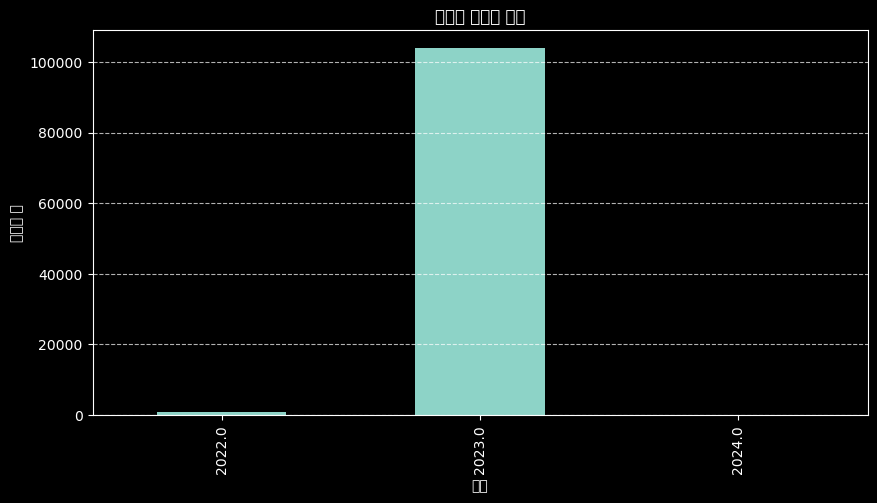

c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Miniconda3\envs\GR_project_1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.


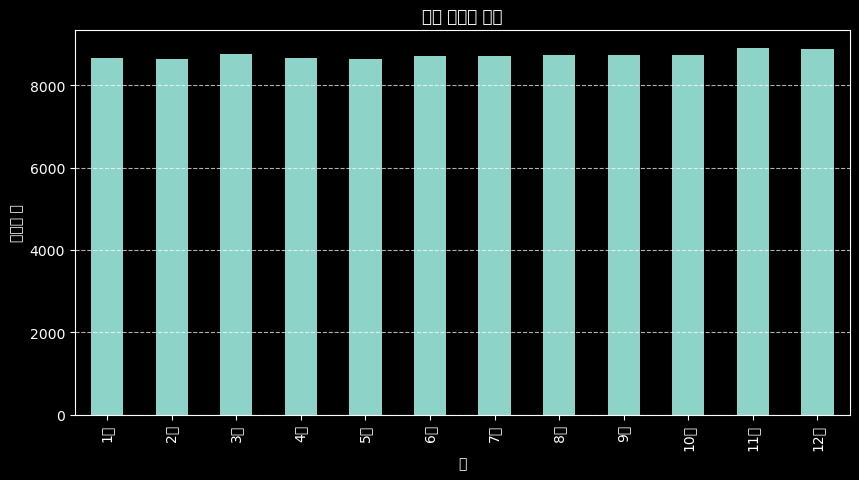

In [83]:
# 1. 기본 통계량 확인
print("=== USE_YEAR 기본 통계 ===")
print(aggregated_df['USE_YEAR'].describe())
print("\n=== USE_MONTH 기본 통계 ===")
print(aggregated_df['USE_MONTH'].describe())

# 2. 연도별 빈도수 확인
year_counts = aggregated_df['USE_YEAR'].value_counts().sort_index()
print("\n연도별 분포:")
print(year_counts)

# 3. 월별 빈도수 확인
month_counts = aggregated_df['USE_MONTH'].value_counts().sort_index()
print("\n월별 분포:")
print(month_counts)

# 4. 시각화 (선택적)
import matplotlib.pyplot as plt

# 연도별 분포 그래프
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar')
plt.title('연도별 데이터 분포')
plt.xlabel('연도')
plt.ylabel('데이터 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 월별 분포 그래프
plt.figure(figsize=(10, 5))
month_counts.plot(kind='bar')
plt.title('월별 데이터 분포')
plt.xlabel('월')
plt.ylabel('데이터 수')
plt.xticks(range(12), ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
aggregated_df['SEQ_NO'].value_counts()

SEQ_NO
3273039    544
6284466     81
3721187     68
6355104     67
521058      63
          ... 
694275       1
552851       1
602789       1
5643350      1
5773147      1
Name: count, Length: 1570, dtype: int64

In [51]:
aggregated_df['ENGY_ESNCNO'].value_counts()

ENGY_ESNCNO
46            2
29            1
59            1
10161         1
10164         1
             ..
6104046714    1
6104047360    1
6104055277    1
6104055299    1
4             1
Name: count, Length: 9653, dtype: int64

In [84]:
aggregated_df

,SEQ_NO,MGM_BLD_PK,ENGY_ESNCNO,UNIT_CD,ENGY_type,USE_YM,USE_END_DAY,USE_QTY,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_END_DATE,USE_YEAR,USE_MONTH
0,4233,51170-1220,700173961,1,11,202301,20221231.0,7.0,67459.997167,42373.16691,0.0,2022-12-31,2022.0,12.0
1,4233,51170-1220,700173961,1,11,202302,20230131.0,7.0,67459.997167,42373.16691,0.0,2023-01-31,2023.0,1.0
2,4233,51170-1220,700173961,1,11,202303,20230228.0,7.0,67459.997167,42373.16691,0.0,2023-02-28,2023.0,2.0
3,4233,51170-1220,700173961,1,11,202304,20230331.0,7.0,67459.997167,42373.16691,0.0,2023-03-31,2023.0,3.0
4,4233,51170-1220,700173961,1,11,202305,20230430.0,7.0,67459.997167,42373.16691,0.0,2023-04-30,2023.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104789,10000004803234,27200-18045,541665036,1,11,202308,20230823.0,150.0,384212.994327,0.00000,0.0,2023-08-23,2023.0,8.0
104790,10000004803234,27200-18045,541665036,1,11,202309,20230923.0,150.0,384212.994327,0.00000,0.0,2023-09-23,2023.0,9.0
104791,10000004803234,27200-18045,541665036,1,11,202310,20231023.0,150.0,384212.994327,0.00000,0.0,2023-10-23,2023.0,10.0
104792,10000004803234,27200-18045,541665036,1,11,202311,20231123.0,150.0,384212.994327,0.00000,0.0,2023-11-23,2023.0,11.0


In [86]:
aggregated_df = result_1.groupby(
    ["SEQ_NO","MGM_BLD_PK","ENGY_ESNCNO", "UNIT_CD", "ENGY_type"], as_index=False
).agg({
    "USE_QTY": "sum",
    #"SEQ_NO": "first",    # 그룹 내 첫번째 값을 사용 (한 에너지 고유번호당 값이 동일하므로)
    #"MGM_BLD_PK": "first",
    "E사용량 (kWh)_전기 (KWH)": "first",       # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_가스 (KWH)": "first",        # 그룹 내 첫번째 값을 사용
    "E사용량 (kWh)_지역냉난방 (KWH)": "first"    # 그룹 내 첫번째 값을 사용
})

aggregated_df


,SEQ_NO,MGM_BLD_PK,ENGY_ESNCNO,UNIT_CD,ENGY_type,USE_QTY,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH)
0,4233,51170-1220,700173961,1,11,84.0,67459.997167,42373.16691,0.0
1,4233,51170-1220,702632980,1,11,114.0,67459.997167,42373.16691,0.0
2,4233,51170-1220,706375571,1,11,1461.0,67459.997167,42373.16691,0.0
3,4233,51170-1220,710016195,1,11,65999.0,67459.997167,42373.16691,0.0
4,4233,51170-1220,712086506,1,11,6049.0,67459.997167,42373.16691,0.0
...,...,...,...,...,...,...,...,...,...
9649,10000004793987,29170-34729,4000901930,8,12,16219580.0,130091.996727,0.00000,0.0
9650,10000004803234,27200-18045,526219190,1,11,132950.0,384212.994327,0.00000,0.0
9651,10000004803234,27200-18045,526219207,1,11,251263.0,384212.994327,0.00000,0.0
9652,10000004803234,27200-18045,541665027,1,11,600.0,384212.994327,0.00000,0.0


In [87]:
import numpy as np


conversion_factors = {
    1: 1.0,         # 1: KWh 그대로
    2: 10.6962086,  # 2: N㎥ → kWh
    3: 1163.0,      # 3: Gcal → kWh
    4: 1000.0,      # 4: MWh → kWh
    6: 1.163,       # 6: Mcal → kWh
    8: 0.2778236    # 8: MJ → kWh
    # 나머지 (5, 7, 9, 10, 14)는 변환계수가 없으므로 생략합니다.
}


In [88]:
# USE_QTY를 kWh 단위로 변환하는 함수 생성
def convert_to_kwh(row):
    unit_cd = row['UNIT_CD']
    qty = row['USE_QTY'] 
    
    if unit_cd in conversion_factors:
        return qty * conversion_factors[unit_cd]
    else:
        return float('nan')  # 변환계수가 없는 경우 NaN 반환

# 새로운 변수 'USE_QTY_kWh' 생성
aggregated_df['USE_QTY_kWh'] = aggregated_df.apply(convert_to_kwh, axis=1)

# 결과 확인
print(aggregated_df[['UNIT_CD', 'USE_QTY', 'USE_QTY_kWh']].head())

   UNIT_CD  USE_QTY  USE_QTY_kWh
0        1     84.0         84.0
1        1    114.0        114.0
2        1   1461.0       1461.0
3        1  65999.0      65999.0
4        1   6049.0       6049.0


In [91]:
# ENGY_type에 따라 각 에너지 사용량과 변환된 USE_QTY_kWh 값 비교
# 전기(11), 가스(12), 지역냉난방(13)별로 비교

# 전기(11) 비교
electricity_df = aggregated_df[aggregated_df['ENGY_type'] == 11].copy()
electricity_df['일치여부'] = np.isclose(electricity_df['E사용량 (kWh)_전기 (KWH)'], electricity_df['USE_QTY_kWh'])
print("전기(ENGY_type=11) 사용량 일치 여부:")
print(f"총 {len(electricity_df)}개 중 {electricity_df['일치여부'].sum()}개 일치 ({electricity_df['일치여부'].mean()*100:.2f}%)")
print(electricity_df[['E사용량 (kWh)_전기 (KWH)', 'USE_QTY_kWh', '일치여부']].head())
print("\n일치하는 행:")
print(electricity_df[electricity_df['일치여부'] == True][['E사용량 (kWh)_전기 (KWH)', 'USE_QTY_kWh', '일치여부']].head())
print("\n")

# 가스(12) 비교
gas_df = aggregated_df[aggregated_df['ENGY_type'] == 12].copy()
gas_df['일치여부'] = np.isclose(gas_df['E사용량 (kWh)_가스 (KWH)'], gas_df['USE_QTY_kWh'])
print("가스(ENGY_type=12) 사용량 일치 여부:")
print(f"총 {len(gas_df)}개 중 {gas_df['일치여부'].sum()}개 일치 ({gas_df['일치여부'].mean()*100:.2f}%)")
print(gas_df[['E사용량 (kWh)_가스 (KWH)', 'USE_QTY_kWh', '일치여부']].head())
print("\n일치하는 행:")
print(gas_df[gas_df['일치여부'] == True][['E사용량 (kWh)_가스 (KWH)', 'USE_QTY_kWh', '일치여부']].head())
print("\n")

# 지역냉난방(13) 비교
district_df = aggregated_df[aggregated_df['ENGY_type'] == 13].copy()
district_df['일치여부'] = np.isclose(district_df['E사용량 (kWh)_지역냉난방 (KWH)'], district_df['USE_QTY_kWh'])
print("지역냉난방(ENGY_type=13) 사용량 일치 여부:")
print(f"총 {len(district_df)}개 중 {district_df['일치여부'].sum()}개 일치 ({district_df['일치여부'].mean()*100:.2f}%)")
print(district_df[['E사용량 (kWh)_지역냉난방 (KWH)', 'USE_QTY_kWh', '일치여부']].head())
print("\n일치하는 행:")
print(district_df[district_df['일치여부'] == True][['E사용량 (kWh)_지역냉난방 (KWH)', 'USE_QTY_kWh', '일치여부']].head())

# 원본 데이터프레임 출력
aggregated_df

전기(ENGY_type=11) 사용량 일치 여부:
총 6685개 중 432개 일치 (6.46%)
   E사용량 (kWh)_전기 (KWH)  USE_QTY_kWh   일치여부
0         67459.997167         84.0  False
1         67459.997167        114.0  False
2         67459.997167       1461.0  False
3         67459.997167      65999.0  False
4         67459.997167       6049.0  False

일치하는 행:
    E사용량 (kWh)_전기 (KWH)  USE_QTY_kWh  일치여부
41         1.608024e+06    1608024.0  True
46         1.885220e+05     188522.0  True
51         1.793410e+05     179341.0  True
61         2.586700e+05     258670.0  True
63         2.801180e+05     280118.0  True


가스(ENGY_type=12) 사용량 일치 여부:
총 2813개 중 36개 일치 (1.28%)
    E사용량 (kWh)_가스 (KWH)   USE_QTY_kWh   일치여부
18         2.677891e+05  2.966001e+05  False
39         2.348345e+05  2.609785e+05  False
40         2.348345e+05  1.797924e+04  False
42         1.335670e+06  1.485024e+06  False
44         0.000000e+00  1.034921e+04  False

일치하는 행:
      E사용량 (kWh)_가스 (KWH)  USE_QTY_kWh  일치여부
609                   0.0          0.0  Tr

,SEQ_NO,MGM_BLD_PK,ENGY_ESNCNO,UNIT_CD,ENGY_type,USE_QTY,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_kWh
0,4233,51170-1220,700173961,1,11,84.0,67459.997167,42373.16691,0.0,8.400000e+01
1,4233,51170-1220,702632980,1,11,114.0,67459.997167,42373.16691,0.0,1.140000e+02
2,4233,51170-1220,706375571,1,11,1461.0,67459.997167,42373.16691,0.0,1.461000e+03
3,4233,51170-1220,710016195,1,11,65999.0,67459.997167,42373.16691,0.0,6.599900e+04
4,4233,51170-1220,712086506,1,11,6049.0,67459.997167,42373.16691,0.0,6.049000e+03
...,...,...,...,...,...,...,...,...,...,...
9649,10000004793987,29170-34729,4000901930,8,12,16219580.0,130091.996727,0.00000,0.0,4.506182e+06
9650,10000004803234,27200-18045,526219190,1,11,132950.0,384212.994327,0.00000,0.0,1.329500e+05
9651,10000004803234,27200-18045,526219207,1,11,251263.0,384212.994327,0.00000,0.0,2.512630e+05
9652,10000004803234,27200-18045,541665027,1,11,600.0,384212.994327,0.00000,0.0,6.000000e+02


In [94]:
electricity_df[electricity_df['일치여부'] == True][['E사용량 (kWh)_전기 (KWH)', 'USE_QTY_kWh', '일치여부']]

,E사용량 (kWh)_전기 (KWH),USE_QTY_kWh,일치여부
41,1.608024e+06,1608024.0,True
46,1.885220e+05,188522.0,True
51,1.793410e+05,179341.0,True
61,2.586700e+05,258670.0,True
63,2.801180e+05,280118.0,True
...,...,...,...
9535,3.654434e+06,3654434.0,True
9546,1.299000e+06,1299000.0,True
9591,3.391568e+06,3391568.0,True
9595,3.422360e+05,342236.0,True


In [92]:
gas_df[gas_df['일치여부'] == True][['E사용량 (kWh)_가스 (KWH)', 'USE_QTY_kWh', '일치여부']]

,E사용량 (kWh)_가스 (KWH),USE_QTY_kWh,일치여부
609,0.0,0.0,True
864,0.0,0.0,True
1248,0.0,0.0,True
1565,0.0,0.0,True
2128,0.0,0.0,True
2130,0.0,0.0,True
2201,0.0,0.0,True
2331,0.0,0.0,True
2444,0.0,0.0,True
3222,0.0,0.0,True


In [62]:
aggregated_df['ENGY_ESNCNO'].value_counts()

ENGY_ESNCNO
46            2
29            1
59            1
10161         1
10164         1
             ..
6104046714    1
6104047360    1
6104055277    1
6104055299    1
4             1
Name: count, Length: 9653, dtype: int64

In [63]:
aggregated_df['UNIT_CD'].value_counts()

UNIT_CD
1    6685
8    2807
3     135
4      18
2       6
6       3
Name: count, dtype: int64

In [108]:
aggregated_df['ENGY_type'].value_counts()

ENGY_type
11    6685
12    2813
13     156
Name: count, dtype: Int64

In [113]:
# 피벗을 위한 인덱스 목록 (필요한 값들을 포함)
index_cols = ["ENGY_ESNCNO", "UNIT_CD", "SEQ_NO", "MGM_BLD_PK", "E사용량 (kWh)_전기 (KWH)", "E사용량 (kWh)_가스 (KWH)", "E사용량 (kWh)_지역냉난방 (KWH)"]

# aggregated_df를 ENGY_type(11,12,13)에 따라 USE_QTY 값을 피벗하여 새로운 데이터프레임 생성
pivot_df = aggregated_df.pivot(index=index_cols, columns="ENGY_type", values="USE_QTY").reset_index()

# 피벗된 컬럼 (에너지 타입)이 숫자로 되어있으므로, 이를 USE_QTY_11, USE_QTY_12, USE_QTY_13으로 이름 변경
pivot_df = pivot_df.rename(columns={
    11: 'USE_QTY_11',
    12: 'USE_QTY_12',
    13: 'USE_QTY_13'
})


# 결과 확인
pivot_df


ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
0,4.000000e+00,3.0,5334976,44810-100214543,2.132705e+06,1.272160e+05,415847.427460,NaN,NaN,491.16
1,2.900000e+01,6.0,774699,41370-100175872,6.545150e+05,0.000000e+00,194127.570240,NaN,NaN,250280.00
2,4.600000e+01,3.0,2473583,30200-100177670,2.063007e+06,1.430016e+04,498261.633811,NaN,NaN,298.66
3,4.600000e+01,6.0,2473583,30200-100177670,2.063007e+06,1.430016e+04,498261.633811,NaN,NaN,588500.00
4,5.900000e+01,6.0,6284469,30230-10947,6.254510e+05,9.668293e+04,887896.396000,NaN,NaN,1048700.00
...,...,...,...,...,...,...,...,...,...,...
9649,6.104511e+09,8.0,4443068,28177-17939,2.161598e+06,1.971172e+06,0.000000,NaN,3.609187e+04,NaN
9650,6.104511e+09,8.0,603578,41192-100192071,4.993679e+05,6.170120e+05,0.000000,NaN,1.972469e+04,NaN
9651,1.276963e+10,8.0,4091378,31200-7813,1.330900e+05,2.208885e+05,0.000000,NaN,1.109863e+06,NaN
9652,1.590026e+10,8.0,4101590,31140-9248,2.188815e+06,3.338372e+04,0.000000,NaN,2.014162e+06,NaN


In [109]:
pivot_df[pivot_df['USE_QTY_11'].notna()]

ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
1005,1.000045e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,437597.0,NaN,NaN
1006,1.000332e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,784.0,NaN,NaN
1007,1.000348e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,504.0,NaN,NaN
1008,1.000461e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,36492.0,NaN,NaN
1009,1.000508e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,8528.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8643,1.719441e+09,1.0,205225,51820-100181368,5.864410e+05,0.000000e+00,0.000,1109.0,NaN,NaN
8644,1.719447e+09,1.0,381460,51110-100231221,1.481570e+05,7.498345e+05,0.000,676.0,NaN,NaN
8645,1.719463e+09,1.0,321371,51110-23799,1.930230e+05,0.000000e+00,0.000,738.0,NaN,NaN
8646,1.719542e+09,1.0,205029,51110-100217233,1.579883e+06,2.264937e+06,0.000,1309.0,NaN,NaN


In [114]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENGY_ESNCNO             9654 non-null   float64
 1   UNIT_CD                 9654 non-null   float64
 2   SEQ_NO                  9654 non-null   int64  
 3   MGM_BLD_PK              9654 non-null   object 
 4   E사용량 (kWh)_전기 (KWH)     9654 non-null   float64
 5   E사용량 (kWh)_가스 (KWH)     9654 non-null   float64
 6   E사용량 (kWh)_지역냉난방 (KWH)  9654 non-null   float64
 7   USE_QTY_11              6685 non-null   float64
 8   USE_QTY_12              2813 non-null   float64
 9   USE_QTY_13              156 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 754.3+ KB


In [115]:
pivot_df.describe()

ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
count,9.654000e+03,9654.000000,9.654000e+03,9.654000e+03,9.654000e+03,9.654000e+03,6.685000e+03,2.813000e+03,1.560000e+02
mean,8.991974e+08,3.071059,1.601439e+11,1.661020e+06,6.440153e+05,5.432201e+04,5.315784e+06,7.250243e+07,7.699903e+04
std,1.423322e+09,3.168614,1.253129e+12,9.859946e+06,2.609525e+06,3.120206e+05,3.170753e+08,5.824242e+08,3.145074e+05
min,4.000000e+00,1.000000,4.233000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.391756e+04,0.000000e+00
25%,1.508148e+08,1.000000,5.161032e+05,3.252570e+05,0.000000e+00,0.000000e+00,1.368000e+03,4.391900e+04,1.592225e+02
50%,3.344048e+08,1.000000,3.273039e+06,6.305451e+05,1.648690e+05,0.000000e+00,8.317000e+03,2.221070e+05,3.824150e+02
75%,1.022215e+09,8.000000,5.413133e+06,1.207422e+06,5.037367e+05,0.000000e+00,6.683400e+04,1.010538e+06,9.362000e+02
max,1.613630e+10,8.000000,1.000000e+13,4.302760e+08,1.085609e+08,4.376406e+06,2.513413e+10,1.260863e+10,2.627040e+06


In [118]:
# result 폴더 아래에 엑셀 파일로 저장
pivot_df.to_excel(r'../result/pivot_df.xlsx', index=False)
pivot_df

ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
0,4.000000e+00,3.0,5334976,44810-100214543,2.132705e+06,1.272160e+05,415847.427460,NaN,NaN,491.16
1,2.900000e+01,6.0,774699,41370-100175872,6.545150e+05,0.000000e+00,194127.570240,NaN,NaN,250280.00
2,4.600000e+01,3.0,2473583,30200-100177670,2.063007e+06,1.430016e+04,498261.633811,NaN,NaN,298.66
3,4.600000e+01,6.0,2473583,30200-100177670,2.063007e+06,1.430016e+04,498261.633811,NaN,NaN,588500.00
4,5.900000e+01,6.0,6284469,30230-10947,6.254510e+05,9.668293e+04,887896.396000,NaN,NaN,1048700.00
...,...,...,...,...,...,...,...,...,...,...
9649,6.104511e+09,8.0,4443068,28177-17939,2.161598e+06,1.971172e+06,0.000000,NaN,3.609187e+04,NaN
9650,6.104511e+09,8.0,603578,41192-100192071,4.993679e+05,6.170120e+05,0.000000,NaN,1.972469e+04,NaN
9651,1.276963e+10,8.0,4091378,31200-7813,1.330900e+05,2.208885e+05,0.000000,NaN,1.109863e+06,NaN
9652,1.590026e+10,8.0,4101590,31140-9248,2.188815e+06,3.338372e+04,0.000000,NaN,2.014162e+06,NaN


In [116]:
pivot_kwh=pivot_df[pivot_df['UNIT_CD']==1]
pivot_kwh


ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,MGM_BLD_PK,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
1005,1.000045e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,437597.0,NaN,NaN
1006,1.000332e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,784.0,NaN,NaN
1007,1.000348e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,504.0,NaN,NaN
1008,1.000461e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,36492.0,NaN,NaN
1009,1.000508e+07,1.0,5704586,44131-100235376,3.573184e+05,0.000000e+00,149055.213,8528.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8643,1.719441e+09,1.0,205225,51820-100181368,5.864410e+05,0.000000e+00,0.000,1109.0,NaN,NaN
8644,1.719447e+09,1.0,381460,51110-100231221,1.481570e+05,7.498345e+05,0.000,676.0,NaN,NaN
8645,1.719463e+09,1.0,321371,51110-23799,1.930230e+05,0.000000e+00,0.000,738.0,NaN,NaN
8646,1.719542e+09,1.0,205029,51110-100217233,1.579883e+06,2.264937e+06,0.000,1309.0,NaN,NaN


In [117]:
pivot_kwh.describe()

ENGY_type,ENGY_ESNCNO,UNIT_CD,SEQ_NO,E사용량 (kWh)_전기 (KWH),E사용량 (kWh)_가스 (KWH),E사용량 (kWh)_지역냉난방 (KWH),USE_QTY_11,USE_QTY_12,USE_QTY_13
count,6.685000e+03,6685.0,6.685000e+03,6.685000e+03,6.685000e+03,6.685000e+03,6.685000e+03,0.0,0.0
mean,5.445417e+08,1.0,1.543784e+11,1.691153e+06,5.674221e+05,4.428370e+04,5.315784e+06,NaN,NaN
std,4.347591e+08,0.0,1.231851e+12,1.012614e+07,2.278955e+06,2.807071e+05,3.170753e+08,NaN,NaN
min,1.000045e+07,1.0,4.233000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,1.571731e+08,1.0,5.071410e+05,3.197490e+05,0.000000e+00,0.000000e+00,1.368000e+03,NaN,NaN
50%,4.016997e+08,1.0,3.273039e+06,6.234750e+05,1.202581e+05,0.000000e+00,8.317000e+03,NaN,NaN
75%,9.268373e+08,1.0,5.413133e+06,1.120834e+06,3.980449e+05,0.000000e+00,6.683400e+04,NaN,NaN
max,1.719591e+09,1.0,1.000000e+13,2.099932e+08,5.538375e+07,4.376406e+06,2.513413e+10,NaN,NaN


In [121]:
# 전기, 가스, 지역냉난방 사용량 비교 (nan 값 제외)
electric_comparison = (pivot_df['E사용량 (kWh)_전기 (KWH)'] == pivot_df['USE_QTY_11']) & (pivot_df['USE_QTY_11'].notna())
gas_comparison = (pivot_df['E사용량 (kWh)_가스 (KWH)'] == pivot_df['USE_QTY_12']) & (pivot_df['USE_QTY_12'].notna())
district_comparison = (pivot_df['E사용량 (kWh)_지역냉난방 (KWH)'] == pivot_df['USE_QTY_13']) & (pivot_df['USE_QTY_13'].notna())

# 각 에너지별 일치/불일치 건수 계산
print('전기 사용량 비교 (USE_QTY_11이 있는 경우만):')
print(f'일치하는 건수: {electric_comparison.sum()}')
print(f'일치하지 않는 건수: {(~electric_comparison & pivot_df["USE_QTY_11"].notna()).sum()}')

print('\n가스 사용량 비교 (USE_QTY_12가 있는 경우만):')
print(f'일치하는 건수: {gas_comparison.sum()}')
print(f'일치하지 않는 건수: {(~gas_comparison & pivot_df["USE_QTY_12"].notna()).sum()}')

print('\n지역냉난방 사용량 비교 (USE_QTY_13이 있는 경우만):')
print(f'일치하는 건수: {district_comparison.sum()}')
print(f'일치하지 않는 건수: {(~district_comparison & pivot_df["USE_QTY_13"].notna()).sum()}')

# 일치하지 않는 케이스들의 예시 확인 (각 에너지별 처음 3개)
print('\n일치하지 않는 케이스 예시:')
print('\n전기 사용량 불일치 예시:')
print(pivot_df[~electric_comparison & pivot_df['USE_QTY_11'].notna()][['E사용량 (kWh)_전기 (KWH)', 'USE_QTY_11']].head(3))

print('\n가스 사용량 불일치 예시:')
print(pivot_df[~gas_comparison & pivot_df['USE_QTY_12'].notna()][['E사용량 (kWh)_가스 (KWH)', 'USE_QTY_12']].head(3))

print('\n지역냉난방 사용량 불일치 예시:')
print(pivot_df[~district_comparison & pivot_df['USE_QTY_13'].notna()][['E사용량 (kWh)_지역냉난방 (KWH)', 'USE_QTY_13']].head(3))

전기 사용량 비교 (USE_QTY_11이 있는 경우만):
일치하는 건수: 5
일치하지 않는 건수: 6680

가스 사용량 비교 (USE_QTY_12가 있는 경우만):
일치하는 건수: 36
일치하지 않는 건수: 2777

지역냉난방 사용량 비교 (USE_QTY_13이 있는 경우만):
일치하는 건수: 1
일치하지 않는 건수: 155

일치하지 않는 케이스 예시:

전기 사용량 불일치 예시:
ENGY_type  E사용량 (kWh)_전기 (KWH)  USE_QTY_11
1005                357318.444    437597.0
1006                357318.444       784.0
1007                357318.444       504.0

가스 사용량 불일치 예시:
ENGY_type  E사용량 (kWh)_가스 (KWH)   USE_QTY_12
51                1.377831e+06  1347362.716
52                1.377831e+06  8789747.884
53                1.377831e+06  7461830.000

지역냉난방 사용량 불일치 예시:
ENGY_type  E사용량 (kWh)_지역냉난방 (KWH)  USE_QTY_13
0                   415847.427460      491.16
1                   194127.570240   250280.00
2                   498261.633811      298.66


In [123]:
pivot_df['MGM_BLD_PK'].nunique()


1570